## Imports

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

### Data preparation

In [42]:
committer_involvement = pd.read_csv("../dataset/committer_involvement.csv", names=["Issue ID", "Project Name", "User ID", "Start Issue", "Six Months Prior", "Commit Amount Half Year", "Total Commits"]).convert_dtypes()
committer_involvement.info()
### Drop rows where there is no project name; unclear data
committer_involvement = committer_involvement.dropna()
committer_involvement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2986 entries, 0 to 2985
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Issue ID                 2986 non-null   Int64 
 1   Project Name             2491 non-null   string
 2   User ID                  2986 non-null   Int64 
 3   Start Issue              2986 non-null   string
 4   Six Months Prior         2986 non-null   string
 5   Commit Amount Half Year  2986 non-null   Int64 
 6   Total Commits            2986 non-null   Int64 
dtypes: Int64(4), string(3)
memory usage: 175.1 KB
<class 'pandas.core.frame.DataFrame'>
Index: 2491 entries, 73 to 2985
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Issue ID                 2491 non-null   Int64 
 1   Project Name             2491 non-null   string
 2   User ID                  2491 non-null   Int64 

In [43]:
### remove duplicate user IDs
committer_involvement.drop_duplicates(subset=["User ID"], inplace=True)
committer_involvement.head(100)
# committer_involvement.info()

,Issue ID,Project Name,User ID,Start Issue,Six Months Prior,Commit Amount Half Year,Total Commits
73,12894489,doctrine/mongodb-odm,383198,2013-04-07,2012-08-07,0,0
74,12894489,doctrine/mongodb-odm,470626,2013-04-07,2012-08-07,2,2
75,12894489,doctrine/mongodb-odm,26384082,2013-04-07,2012-08-07,0,0
76,13258430,capistrano/capistrano,18952,2013-04-16,2012-08-16,3,3
77,13258430,capistrano/capistrano,189693,2013-04-16,2012-08-16,0,0
...,...,...,...,...,...,...,...
168,47049745,scikit-learn/scikit-learn,5497303,2014-10-28,2014-02-28,0,0
169,47049745,scikit-learn/scikit-learn,5961927,2014-10-28,2014-02-28,0,0
170,47049745,scikit-learn/scikit-learn,9435135,2014-10-28,2014-02-28,0,0
171,47049745,scikit-learn/scikit-learn,9487348,2014-10-28,2014-02-28,0,0


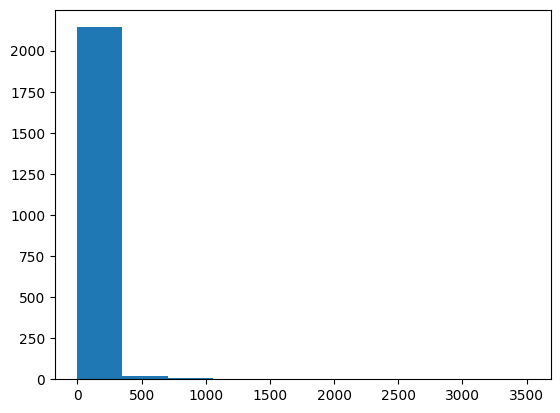

In [44]:
plt.hist(committer_involvement["Commit Amount Half Year"])
plt.show()

In [45]:
distinct_zero = committer_involvement[committer_involvement["Commit Amount Half Year"] == 0]
distinct_commits = committer_involvement[committer_involvement["Commit Amount Half Year"] > 0]

distinct_zero.info()
distinct_commits.info()

# 2178 distinct users -> 80.9% of which have not contributed to the project in the 6 months prior to the start of the issue

<class 'pandas.core.frame.DataFrame'>
Index: 1761 entries, 73 to 2985
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Issue ID                 1761 non-null   Int64 
 1   Project Name             1761 non-null   string
 2   User ID                  1761 non-null   Int64 
 3   Start Issue              1761 non-null   string
 4   Six Months Prior         1761 non-null   string
 5   Commit Amount Half Year  1761 non-null   Int64 
 6   Total Commits            1761 non-null   Int64 
dtypes: Int64(4), string(3)
memory usage: 116.9 KB
<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 74 to 2984
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Issue ID                 417 non-null    Int64 
 1   Project Name             417 non-null    string
 2   User ID                  417 non-null    Int64 
 3  

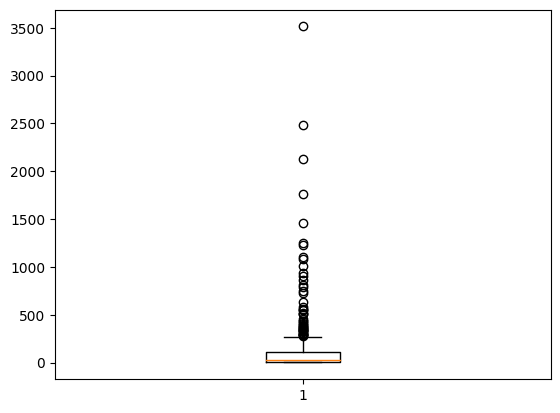

22.0 125.69544364508393 3513
Issue ID                                   1285334524
Project Name               AdguardTeam/AdguardFilters
User ID                                       8361299
Start Issue                                2022-06-27
Six Months Prior                           2021-10-27
Commit Amount Half Year                          3513
Total Commits                                   41275
Name: 2506, dtype: object
Issue ID                                   1285334524
Project Name               AdguardTeam/AdguardFilters
User ID                                       8361299
Start Issue                                2022-06-27
Six Months Prior                           2021-10-27
Commit Amount Half Year                          3513
Total Commits                                   41275
Name: 2506, dtype: object


In [46]:
plt.boxplot(distinct_commits["Commit Amount Half Year"])
# plt.xscale('log')
plt.show()
print(distinct_commits["Commit Amount Half Year"].median(), distinct_commits["Commit Amount Half Year"].mean(), distinct_commits["Commit Amount Half Year"].max())
print(distinct_commits.loc[distinct_commits["Commit Amount Half Year"].idxmax()])
print(distinct_commits.loc[distinct_commits["Total Commits"].idxmax()])

In [47]:
outlier = distinct_commits.sort_values(by=["Commit Amount Half Year"], ascending=False)
outlier.head(20)

,Issue ID,Project Name,User ID,Start Issue,Six Months Prior,Commit Amount Half Year,Total Commits
2506,1285334524,AdguardTeam/AdguardFilters,8361299,2022-06-27,2021-10-27,3513,41275
2902,1464916364,AdguardTeam/AdguardFilters,18536328,2022-11-25,2022-03-25,2484,8275
2904,1464916364,AdguardTeam/AdguardFilters,33488229,2022-11-25,2022-03-25,2123,12108
1347,525140367,php/php-src,216080,2019-11-19,2019-03-19,1758,5245
1204,485217326,symfony/symfony,243674,2019-08-26,2018-12-26,1455,7210
601,268049628,pypa/pipenv,119893,2017-10-24,2017-02-24,1251,1768
245,60472468,rust-lang/rust,64996,2015-03-10,2014-07-10,1229,2709
683,294122809,microsoft/vscode,22350,2018-02-03,2017-06-03,1105,3534
2103,1058585621,oven-sh/bun,709451,2021-11-19,2021-03-19,1081,1081
2888,1444401730,sumneko/lua-language-server,5213431,2022-11-10,2022-03-10,1014,6181


In [48]:
distinct_zero.sort_values(by=["Total Commits"], ascending=False)
distinct_zero.head(20)

,Issue ID,Project Name,User ID,Start Issue,Six Months Prior,Commit Amount Half Year,Total Commits
73,12894489,doctrine/mongodb-odm,383198,2013-04-07,2012-08-07,0,0
75,12894489,doctrine/mongodb-odm,26384082,2013-04-07,2012-08-07,0,0
77,13258430,capistrano/capistrano,189693,2013-04-16,2012-08-16,0,0
78,13258430,capistrano/capistrano,331303,2013-04-16,2012-08-16,0,0
79,13258430,capistrano/capistrano,522155,2013-04-16,2012-08-16,0,0
80,13258430,capistrano/capistrano,4382195,2013-04-16,2012-08-16,0,0
81,13258430,capistrano/capistrano,5461429,2013-04-16,2012-08-16,0,0
83,22814728,Leaflet/Leaflet,1125786,2013-11-18,2013-03-18,0,0
84,22814728,Leaflet/Leaflet,4556741,2013-11-18,2013-03-18,0,0
85,22814728,Leaflet/Leaflet,5626302,2013-11-18,2013-03-18,0,0


Join with annotated_comment_level. Check per user whether they were incivil and what kind of incivility they did.